In [1]:
import numpy as np
import os, sys
from pathlib import Path


sys.path.append("/users/hep/eigen1907/Workspace/Workspace-RPC/modules")
from NanoAODTnP.Plotting.DataLoader import DataLoader
from NanoAODTnP.Plotting.Hist1D import init_figure

In [2]:
workspace = Path('/users/hep/eigen1907/Workspace/Workspace-RPC')

input_path1 = workspace / 'data' / 'efficiency' / 'data' / 'Run2022.root'
roll_blacklist_path1 = workspace / 'data' / 'efficiency' / 'blacklist' / 'roll-blacklist-2022.json'

input_path2 = workspace / 'data' / 'efficiency' / 'data' / 'Run2023.root'
roll_blacklist_path2 = workspace / 'data' / 'efficiency' / 'blacklist' / 'roll-blacklist-2023.json'

geom_path = workspace / 'data' / 'efficiency' / 'geometry' / 'run3.csv'

data1 = DataLoader(
    input_path = input_path1,
    geom_path = geom_path,
    roll_blacklist_path = roll_blacklist_path1
)

data2 = DataLoader(
    input_path = input_path2,
    geom_path = geom_path,
    roll_blacklist_path = roll_blacklist_path2    
)

/users/hep/eigen1907/micromamba/envs/ds4hep/lib/python3.11/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/users/hep/eigen1907/micromamba/envs/ds4hep/lib/python3.11/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


/users/hep/eigen1907/micromamba/envs/ds4hep/lib/python3.11/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


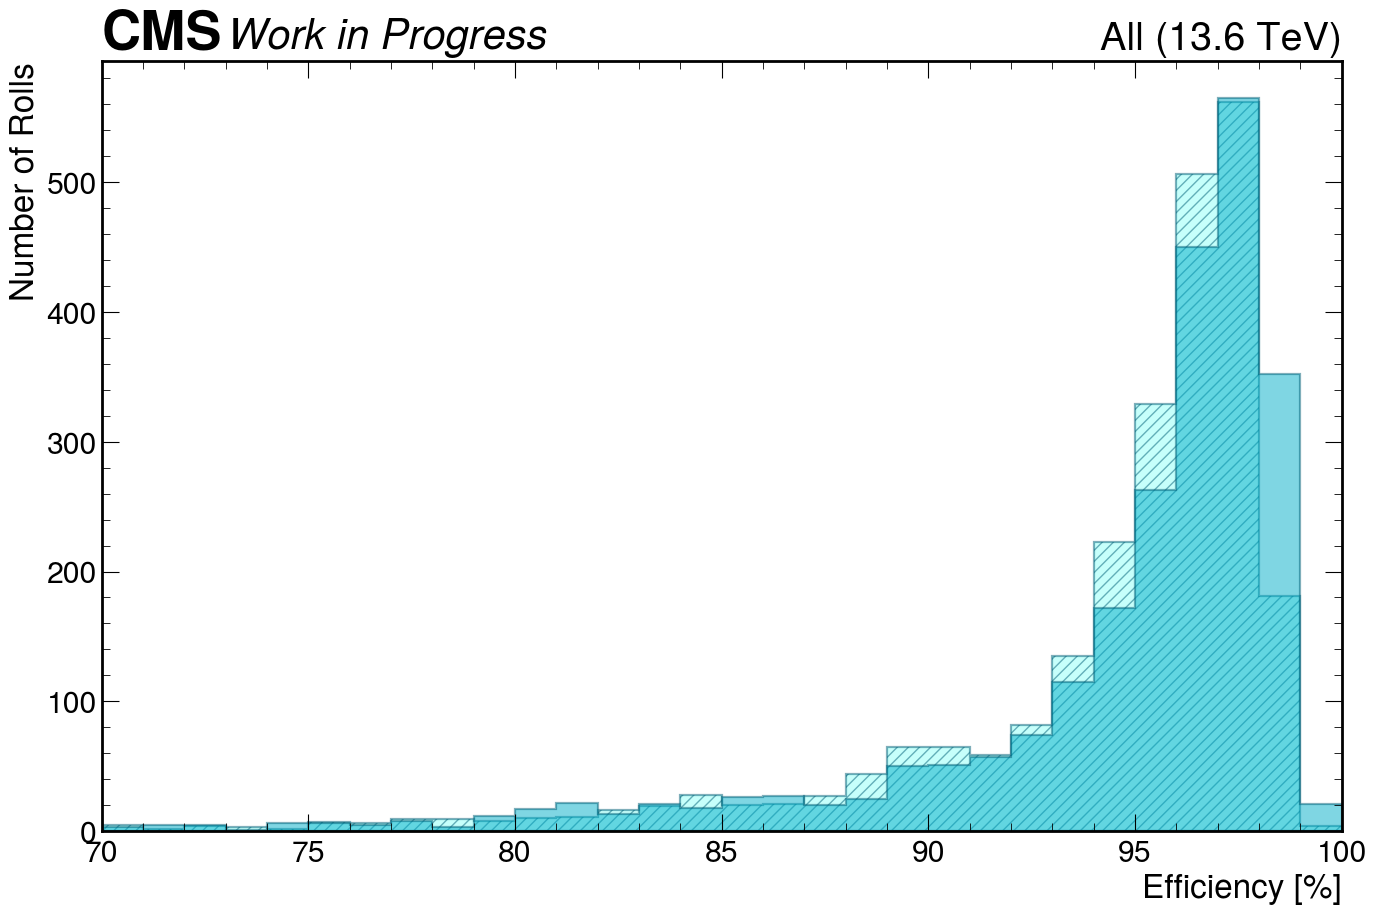

In [6]:
fig, ax = init_figure(
    com = 13.6,
    label1 = 'Work in Progress',
    label2 = 'All',
    loc = 0,
    xlabel = 'Efficiency [%]',
    ylabel = 'Number of Rolls',
    xlim = (70, 100),
    ylim = None,
    xticks = None,
    yticks = None,
    log_scale = False,
)

filtered_data1 = data1.filter_data(keys = 'is_linked', region = 'All')
filtered_data2 = data2.filter_data(keys = 'is_linked', region = 'All')

eff1 = np.divide(
    filtered_data1.passed, filtered_data1.total,
    out = np.zeros_like(filtered_data1.total),
    where = (filtered_data1.total > 0)
) * 100

eff2 = np.divide(
    filtered_data2.passed, filtered_data2.total,
    out = np.zeros_like(filtered_data2.total),
    where = (filtered_data2.total > 0)
) * 100


count1, bins1, patch1 = ax.hist(
    eff1, 
    bins = 101, 
    range = (0, 101),
    facecolor = filtered_data1.facecolors[0],
    edgecolor = filtered_data1.edgecolors[0],
    hatch = filtered_data1.hatches[0],
    alpha = 0.5,
    align = 'mid',
    density = False,
    linewidth = 1.6,
    histtype = 'stepfilled',
)

count2, bins2, patch2 = ax.hist(
    eff2, 
    bins = 101, 
    range = (0, 101),
    facecolor = filtered_data2.facecolors[1],
    edgecolor = filtered_data2.edgecolors[1],
    hatch = filtered_data2.hatches[1],
    alpha = 0.5,
    align = 'mid',
    density = False,
    linewidth = 1.6,
    histtype = 'stepfilled',
)

In [ ]:
print(ax)

Axes(0.125,0.11;0.775x0.77)
